In [35]:
!pip install -qq google-play-scraper

In [36]:
import json
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)

In [37]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [38]:
len(app_packages)

15

In [39]:
app_info = []
for ap in tqdm(app_packages):
    info = app(ap,lang = 'en', country = 'us')
    del info['comments']
    app_info.append(info)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.20it/s]


In [40]:
def print_json(json_object):
    json_str = json.dumps(json_object,indent = 2,sort_keys = True,default = str)
    
    print(highlight(json_str,JsonLexer(),TerminalFormatter()))

    

          

    

In [41]:
print_json(app_info[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar view & agenda vi

In [42]:
import numpy as np
import PIL
import urllib

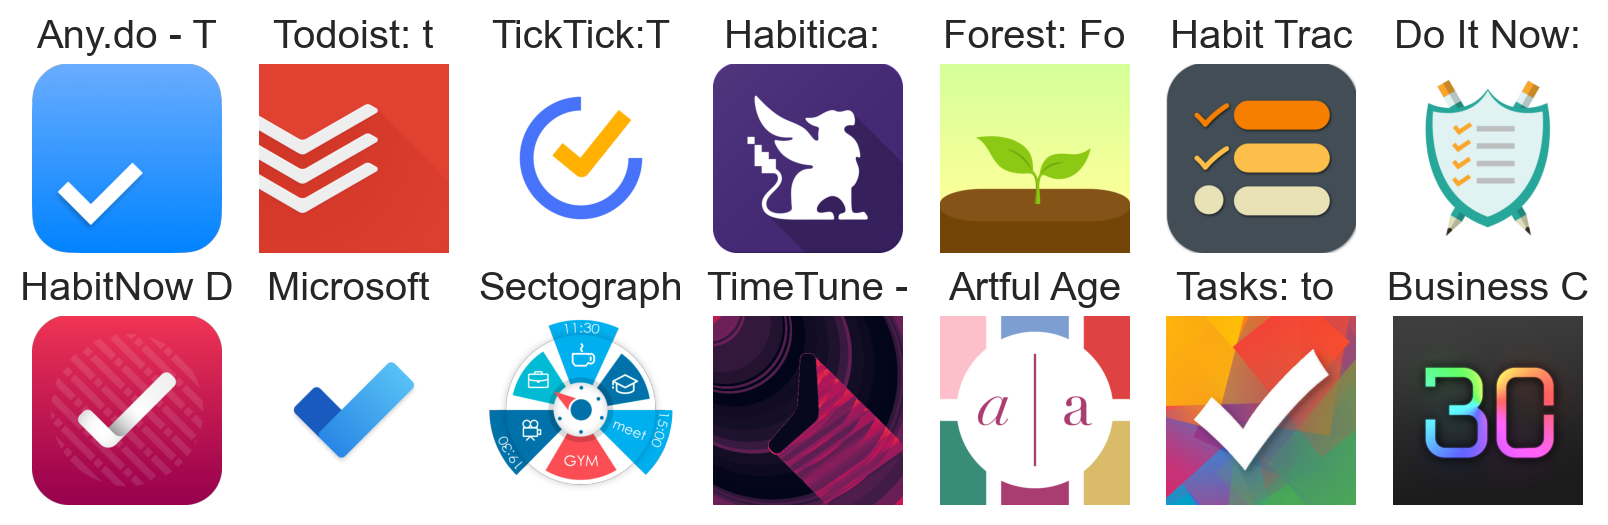

In [45]:
fig, axs = plt.subplots(2,len(app_info) // 2, figsize = (10,3))

for i ,ax in enumerate(axs.flat):
    ai = app_info[i]
    #img = plt.imread(ai['icon'])
    img = np.array(PIL.Image.open(urllib.request.urlopen(ai['icon'])))
    ax.imshow(img)
    
    ax.set_title(ai['title'][:10])
    ax.axis('off')

In [46]:
app_infos_df = pd.DataFrame(app_info)
app_infos_df

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,28869872,4.430406,454324,35879,...,None,False,False,"Nov 10, 2011",1672168610,Varies with device,The new Any.do for Wear OS is finally here!\r\...,The new Any.do for Wear OS is finally here!<br...,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: to-do list & planner,Trusted by 30+ million people and teams worldw...,Trusted by 30+ million people and teams worldw...,Simple yet powerful to-do list. Habit planner ...,"10,000,000+",10000000,35853816,4.488387,249105,15663,...,None,False,False,"Nov 18, 2012",1670987992,Varies with device,Finish the year strong with some exciting feat...,Finish the year strong with some exciting feat...,com.todoist,https://play.google.com/store/apps/details?id=...
2,TickTick:To-do list & Tasks,🥇<b>Great to-do list app for new Android devic...,🥇<b>Great to-do list app for new Android devic...,"Time Management & Planner Reminder, Calendar,...","5,000,000+",5000000,5839815,4.649458,108865,6181,...,None,False,False,"Jun 19, 2013",1672315345,6.4.2.5,- New App Icon Styles are available(Here's the...,- New App Icon Styles are available(Here&#39;s...,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Habitica is a free habit-building and producti...,Habitica is a free habit-building and producti...,Treat your life like a game to stay motivated ...,"1,000,000+",1000000,3732600,4.235405,23294,2562,...,None,True,True,"Dec 10, 2015",1668419050,4.0.5,None,None,com.habitrpg.android.habitica,https://play.google.com/store/apps/details?id=...
4,Forest: Focus for Productivity,Can't stop scrolling? Lack of self-control? Fo...,Can&#39;t stop scrolling? Lack of self-control...,Stay focused on your goal or to dos and get mo...,"10,000,000+",10000000,29556916,4.737982,546827,8206,...,None,True,True,"Aug 25, 2014",1672284455,Varies with device,"Goodbye to a fulfilling 2022, check your 2022 ...","Goodbye to a fulfilling 2022, check your 2022 ...",cc.forestapp,https://play.google.com/store/apps/details?id=...
5,Habit Tracker,» Organize Your Life!\r\nHabitBull is the most...,» Organize Your Life!<br>HabitBull is the most...,"Organize Your life, Track Daily Goals, Build P...","1,000,000+",1000000,3482304,4.397519,79952,6309,...,None,False,False,"Mar 5, 2014",1665554769,1.5.15,Fixed reminder/notification on Android 8.0 and...,Fixed reminder/notification on Android 8.0 and...,com.oristats.habitbull,https://play.google.com/store/apps/details?id=...
6,Do It Now: RPG To Do List,Organize your life with Do It Now - fantastica...,Organize your life with Do It Now - fantastica...,"Increase motivation, achieve daily goals, buil...","500,000+",500000,862476,4.234972,10580,882,...,None,True,True,"Jan 19, 2016",1668670082,Varies with device,🌟 Consumptions per day chart on inventory item...,🌟 Consumptions per day chart on inventory item...,com.levor.liferpgtasks,https://play.google.com/store/apps/details?id=...
7,HabitNow Daily Routine Planner,<b>Keep your routine and tasks organized as yo...,<b>Keep your routine and tasks organized as yo...,"To-do list, Habit Tracker, Routine Planner and...","1,000,000+",1000000,2702655,4.710915,36530,1316,...,None,False,False,"May 17, 2019",1671248524,2.0.6a,"Latest changes:\r\n\r\n✅ Weekly, monthly, year...","Latest changes:<br><br>✅ Weekly, monthly, year...",com.habitnow,https://play.google.com/store/apps/details?id=...
8,Microsoft To Do: Lists & Tasks,Microsoft To Do is a task management app to he...,Microsoft To Do is a task management app to he...,Increase productivity! Make a daily to do list...,"10,000,000+",10

In [47]:
app_infos_df.to_csv('apps.csv', index = None, header = True)

In [48]:
##Get App Reviews

In [72]:
app_reviews = []
for ap in tqdm(app_packages):
    for score in range(1,6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews(
                ap,
                lang = 'en',
                country = 'us',
                sort = sort_order,
                count = 200 if score == 3 else 100,
                filter_score_with = score
            )
            
            for r in rvs:
                for rt in r:
                    print(type(rt))
                   # rt['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                    rt['appId'] = ap
            app_reviews.extend(rvs)
            


  0%|                                                                                           | 0/15 [00:01<?, ?it/s]

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'di

TypeError: '_ContinuationToken' object is not iterable